In [13]:
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt


In [ ]:

fs, audio = wavfile.read('ENF-WHU-Dataset_H1_001.wav')
# fs, audio = wavfile.read('ENF-WHU-Dataset_H0_01.wav')
# fs, audio = wavfile.read('001_ref.wav')

N = len(audio)

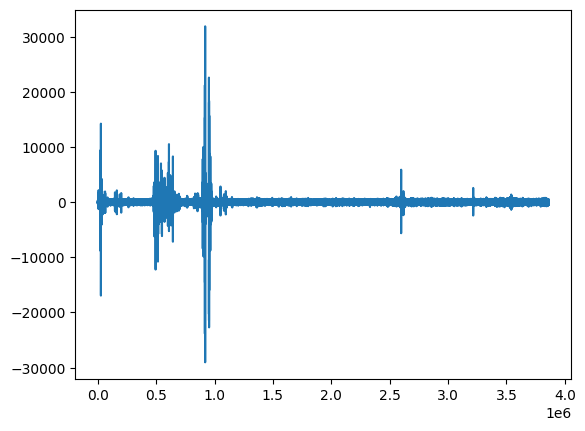

In [4]:
plt.plot(audio)

In [5]:
from scipy.fft import fft

sigfft = fft(audio, n=N)
abssigfft = np.abs(sigfft)
# plt.plot(abssigfft)

(95.0, 105.0)

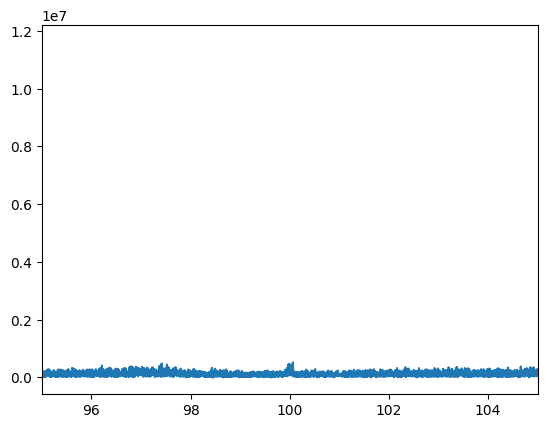

In [6]:
# freqs = np.arange(0, fs, fs/N)
freqs = np.fft.fftfreq(N, 1 / fs)
plt.plot(freqs[:N//2], abssigfft[:N//2])
plt.xlim(95, 105)

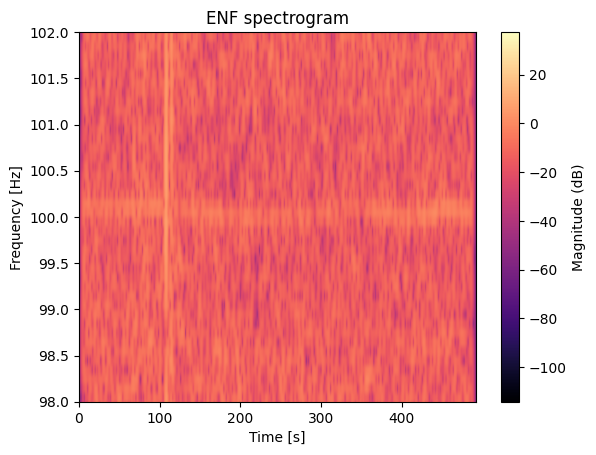

In [7]:
from scipy.signal import ShortTimeFFT, windows

w_s = fs * 10
std = w_s // 6
w = windows.gaussian(w_s, std=std)
hop = fs // 2

SFT = ShortTimeFFT(win=w, hop=hop, fs=fs, scale_to='magnitude')
Sx = SFT.spectrogram(audio)
Sx_dB = 10 * np.log10(Sx)
# Sx_dB = 10 * np.log10(np.maximum(Sx, 1e-12))

freqs = np.arange(Sx.shape[0]) * fs / w_s
times = np.arange(Sx.shape[1]) * hop / fs
# times = (np.arange(Sx.shape[1]) * hop + w_s/2) / fs

plt.imshow(
    Sx_dB,
    origin='lower',
    aspect='auto',
    extent=[times[0], times[-1], freqs[0], freqs[-1]],
    cmap='magma'
)

plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.ylim(98, 102)
plt.title('ENF spectrogram')
plt.show()